In [1]:
import numpy as np
import torch
from torch.autograd import Variable
from matplotlib import pyplot as plt
from project.adam_optim_project.adam import AdamOptimizer
%matplotlib inline

In [2]:
class LinearRegression(torch.nn.Module):
    def __init__(self, input_dim):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 1)
    
    def forward(self, x):
        res = self.linear(x)
        return res

In [3]:
class LinearRegressionTest:
    def __init__(self, input_dim, data_len):
        self.input_dim = input_dim
        self.data_len = data_len
        self.mse = torch.nn.MSELoss()
        self.X = torch.rand(data_len, input_dim)
        self.y = torch.rand(data_len, 1)
        X_np = np.array(self.X)
        best_w = np.linalg.inv(X_np.T@X_np)@X_np.T@np.array(self.y)
        self.min_err = X_np @ best_w - np.array(self.y)
    
    def optimize(self, optimizer_, epochs=1000, **kwargs):
        model = LinearRegression(self.input_dim)
        optimizer = optimizer_(model.parameters(), **kwargs)
        loss_values = []

        for i in range(epochs):
            inputs = Variable(self.X)
            labels = Variable(self.y)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = self.mse(outputs, labels)
            loss.backward()

            optimizer.step()
            loss_values.append(loss.item())

        return np.log(np.array(loss_values) - np.mean(self.min_err**2))

In [4]:
lr = 0.005
optimizers = [
    torch.optim.SGD,
    torch.optim.SGD,
    torch.optim.SGD,
    torch.optim.Adam,
    AdamOptimizer
]
optimizer_names = [
    "SGD", "Momentum SGD", "Nesterov Momentum SGD", "Torch Adam", "Custom Adam"
]
optimizer_params = [
    dict(lr=lr),
    dict(lr=lr, momentum=0.9, nesterov=False),
    dict(lr=lr, momentum=0.9, nesterov=True),
    dict(),
    dict(),
]

In [5]:
def evaluate_test(test, iterations=4):
    plt.figure(figsize=(15, 10))
    for i in range(iterations):
        plt.subplot(2, 2, i + 1)
        test = LinearRegressionTest(input_dim, data_len)
        loss = []
        for optimizer, params in zip(optimizers, optimizer_params):
            loss.append(test.optimize(optimizer, **params))

        for opt_loss, opt_name in zip(loss, optimizer_names):
            plt.plot(opt_loss, label=opt_name)
        
        plt.xlabel("Iterations")
        plt.ylabel("Log loss")
        plt.legend()

/Users/let4ik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log


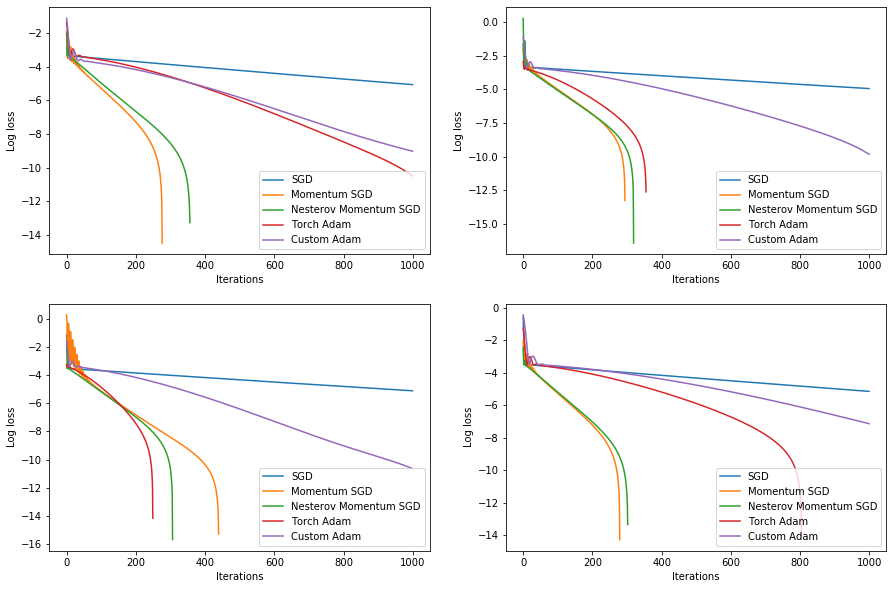

In [6]:
input_dim = 100
data_len = 2000
test = LinearRegressionTest(input_dim, data_len)
evaluate_test(test)